In [1]:
import pandas as pd
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error,r2_score #for testing 

In [2]:
hit=pd.read_csv("hitters.csv")

In [3]:
hit

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806,32,379,311,138,N,E,325,9,3,700.0,N
318,492,136,5,76,50,94,12,5511,1511,39,897,451,875,A,E,313,381,20,875.0,A
319,475,126,3,61,43,52,6,1700,433,7,217,93,146,A,W,37,113,7,385.0,A
320,573,144,9,85,60,78,8,3198,857,97,470,420,332,A,E,1314,131,12,960.0,A


In [4]:
#1)What is the biggest salary and lowest salary in this dataset ?
max_salary=hit['Salary'].max()
min_salary=hit['Salary'].min()

In [5]:
max_salary


2460.0

In [6]:
min_salary

67.5

In [7]:
#2)Is there any null value ?How many null value that dataset has for evey variable in dataset?Drop the null values
hit.isnull().values.any()
hit.isnull().sum()
hit=hit.dropna()


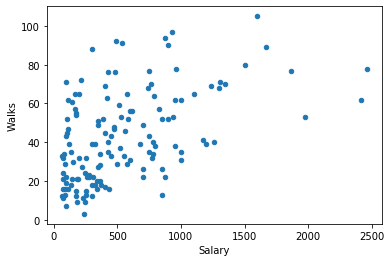

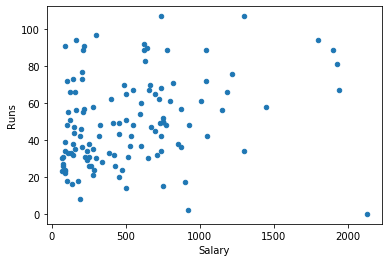

In [8]:
#3)Show Salary/Run and Salary/Walks  accordinng to League on Scatter Plot for seeing how walks and runs effects the salary .
#In this diagram i want to check that runs or walks effecting the salary.
#For some player it is affect in a good way.Some of them no need to so much runs or walks for getting high salary.It is up to player.
hit.query('League=="A"').plot.scatter("Salary","Walks")
hit.query('League=="N"').plot.scatter("Salary","Runs")

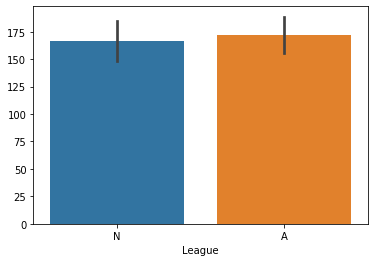

In [9]:
#4)Show categorical variables for seeing numbers difference in bar plot by using pandas seaborn library.
#In this diagram i want to check that which ligs is wanted in League in NewLeague.As you can see Lig ‘A’ is wanted mor for both.
sns.barplot(x="League",y=hit.League.index,data=hit);


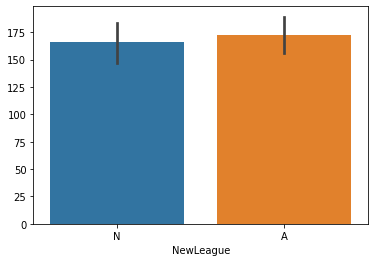

In [10]:
sns.barplot(x="NewLeague",y=hit.League.index,data=hit);

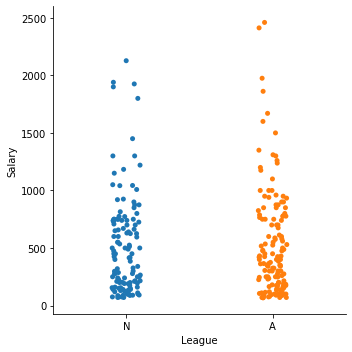

In [11]:
#5)Show League/Salary and NewLeague/Salary in Cat Plot for seeing how league effcets the salary.
#In this diagram i want to check that according to League and NewLeague is salary how raising.As you can see Lig ‘A’ earning more
sns.catplot(x="League",y="Salary",data=hit)

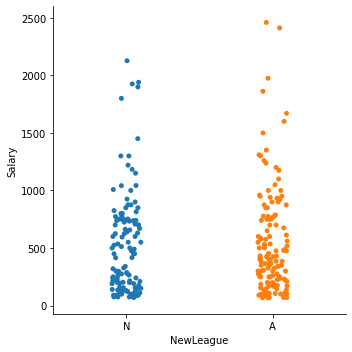

In [12]:
sns.catplot(x="NewLeague",y="Salary",data=hit)

In [13]:
#6)Show 10 most veteran players and 10 beginner players.
hml=hit.nlargest(10, ['Years']) 
hml

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
236,237,52,0,15,25,30,24,14053,4256,160,2165,1314,1566,N,W,523,43,6,750.000,N
121,354,77,16,36,55,41,20,8716,2172,384,1172,1267,1057,N,W,83,174,16,200.000,N
249,419,101,18,65,58,92,20,9528,2510,548,1509,1659,1342,A,W,0,0,0,487.500,A
306,127,32,4,14,25,12,19,8396,2402,242,1048,1348,819,N,W,167,18,6,500.000,N
24,629,168,18,73,102,40,18,8424,2464,164,1008,1072,402,A,E,1067,157,14,776.667,A
73,507,122,29,78,85,91,18,7761,1947,347,1175,1152,1380,A,E,808,108,2,535.000,A
132,278,70,7,22,37,18,18,7186,2081,190,935,1088,643,A,W,0,0,0,325.000,A
245,327,68,13,42,29,45,18,3949,939,78,438,380,466,A,E,659,53,7,400.000,A
278,557,142,21,58,81,23,18,8759,2583,271,1138,1299,478,N,W,1160,53,7,1450.000,N
50,457,101,14,42,63,22,17,6521,1767,281,1003,977,619,A,W,389,39,4,875.000,A


In [14]:
hmm=hit.nsmallest(10,['Years'])
hmm

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
20,413,92,16,72,48,65,1,413,92,16,72,48,65,N,E,280,9,5,100.0,N
21,426,109,3,55,43,62,1,426,109,3,55,43,62,A,W,361,22,2,115.0,N
60,416,113,24,58,69,16,1,416,113,24,58,69,16,A,E,203,70,10,90.0,A
92,317,78,7,35,35,32,1,317,78,7,35,35,32,A,E,45,122,26,70.0,A
109,215,51,4,19,18,11,1,215,51,4,19,18,11,A,E,116,5,12,70.0,A
152,278,86,4,33,38,45,1,278,86,4,33,38,45,N,W,102,4,2,110.0,N
176,181,58,6,34,23,22,1,181,58,6,34,23,22,N,W,88,0,3,86.5,N
188,279,64,0,31,26,30,1,279,64,0,31,26,30,N,W,107,205,16,75.0,N
201,216,54,2,27,25,33,1,216,54,2,27,25,33,N,W,317,36,1,75.0,N
212,209,54,3,25,14,12,1,209,54,3,25,14,12,A,W,102,6,3,68.0,A


In [15]:
#7)Find the average of top 10 salaries and show the slaries on bar plot

In [16]:
top_ten_salary=hit.nlargest(10, ['Salary']) 

In [17]:
top_ten_salary

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
100,495,151,17,61,84,78,10,5624,1679,275,884,1015,709,A,E,1045,88,13,2460.000,A
163,618,200,20,98,110,62,13,7127,2163,351,1104,1289,564,A,E,330,16,8,2412.500,A
217,20,1,0,0,0,0,2,41,9,2,6,7,4,N,E,78,220,6,2127.333,N
82,677,238,31,117,113,53,5,2223,737,93,349,401,171,A,E,1377,100,6,1975.000,A
229,514,144,0,67,54,79,9,4739,1169,13,583,374,528,N,E,229,453,15,1940.000,N
112,490,125,24,81,105,62,13,6063,1646,271,847,999,680,N,E,869,62,8,1925.571,N
84,614,163,29,89,83,75,11,5017,1388,266,813,822,617,N,W,303,6,6,1900.000,N
96,565,148,24,90,104,77,14,7287,2083,305,1135,1234,791,A,E,292,9,5,1861.460,A
179,551,171,13,94,83,94,13,6090,1840,128,969,900,917,N,E,1199,149,5,1800.000,N
248,608,160,28,130,74,89,8,4071,1182,103,862,417,708,A,E,426,4,6,1670.000,A


In [18]:
top_ten_salary['Salary'].mean()

2007.1864

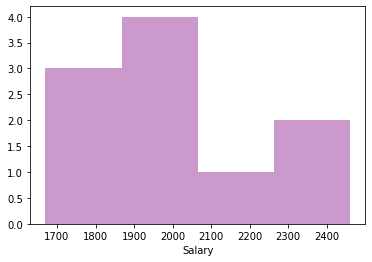

In [19]:
sns.distplot(top_ten_salary.Salary,kde=False,color='Purple')

In [20]:
#8)Which division is more successful ?What is their assist and hit average?Print on the screen.

In [21]:
div_w=hit.query('Division=="W"')

In [52]:
m_W=div_w['Hits'].mean()
m_W

104.14925373134328

In [50]:
div_E=hit.query('Division=="E"')


In [51]:
m_E=div_E['Hits'].mean()

In [25]:
m_E

111.65116279069767

In [26]:
if m_E>m_W:
    print("East more succesful")
elif m_W>m_E:
    print("West more succesful")

East more succesful


In [27]:
#9)Is putouts effects hit numbers of players ?Show with line plot.(Check50 veterans and begginers).After 450 putouts player getting better no matter what.

In [28]:
fyl=hit.nlargest(50, ['Years']) 

In [29]:
fys=hit.nsmallest(50, ['Years']) 

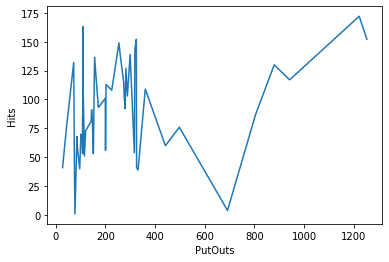

In [30]:
sns.lineplot(x="PutOuts",y="Hits",data=fys)

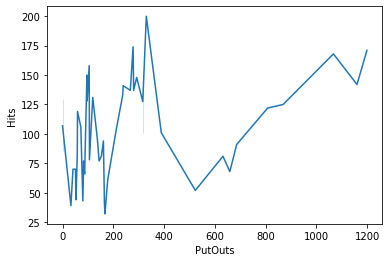

In [31]:
sns.lineplot(x="PutOuts",y="Hits",data=fyl)

In [32]:
#10)Write Polinomial Regression model to predict how hit numbers  changing accoding to run numbers

In [33]:
x = hit.iloc[:,3].values.reshape(-1,1)  #Runs
y = hit.iloc[:,1].values.reshape(-1,1)  #Hits

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state= 42)
# sperate dataset %80 train ve %20 test 

In [35]:

pol_reg = PolynomialFeatures(degree = 8)  # degree:detail 

level_poly = pol_reg.fit_transform(x_train) #according to pol. reg x assigned

lm2 = LinearRegression()  #According to new X i made new reg
lm2.fit(level_poly,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [36]:
guess_poly = lm2.predict(pol_reg.fit_transform([[20]]))
guess_poly 
#kosu degeri 20 olan basketcinin basket atma basarisi(hit success)

array([[48.82891238]])

In [37]:
y_head = lm2.predict(pol_reg.fit_transform(x_train))
y_head[:10]

array([[119.35432137],
       [ 79.77816617],
       [139.12679162],
       [124.99510398],
       [101.16730587],
       [ 41.36317723],
       [153.84324963],
       [168.68603094],
       [160.8064138 ],
       [158.44935856]])

In [38]:
y_test_1 =np.array(range(0,len(y_train)))

Consistency of model = 0.8278481234379089


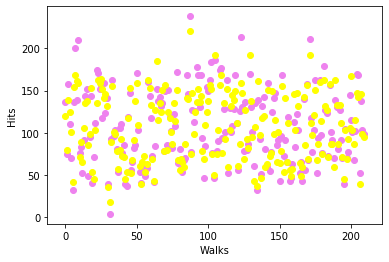

In [39]:
# r2 score:
from sklearn.metrics import r2_score
r2_val = r2_score(y_train, y_head)
print("Consistency of model =", r2_val)

plt.scatter(y_test_1,y_train, color="violet")
plt.scatter(y_test_1, y_head, color = "yellow")
plt.xlabel("Walks")
plt.ylabel("Hits")
plt.show()

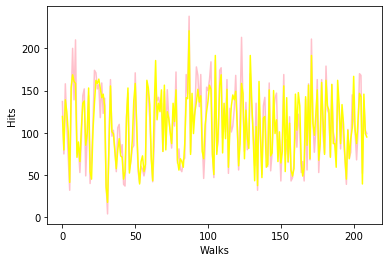

In [40]:
plt.plot(y_test_1,y_train, color="pink")
plt.plot(y_test_1, y_head, color = "yellow")
plt.xlabel("Walks")
plt.ylabel("Hits")
plt.show()

In [41]:
#11)Walks values are effecting is the Hits value?By using decision tree find players hit success.

In [42]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.tree import DecisionTreeRegressor # DecisionTree

In [43]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



In [44]:
x = hit.iloc[:,5].values.reshape(-1,1)    # walking
y = hit.iloc[:,1].values.reshape(-1,1)   # hit

In [45]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state= 42)
# dataset %80 train and %20 test 

In [46]:
# Modelling
tree_reg = DecisionTreeRegressor()   #Model
tree_reg.fit(x_train,y_train)   #i send x and y to model now my model is ready

print(tree_reg.predict([[40]])) # The player which is walk value is 40 ,is success value.

[133.6]


In [47]:
y_test_1 =np.array(range(0,len(y_train)))

R2 =  0.8278481234379089


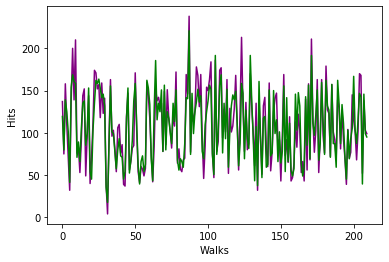

In [48]:
# r2 : 
r2_value = r2_score(y_train, y_head)
print("R2 = ",r2_value)

plt.plot(y_test_1,y_train, color="purple")
plt.plot(y_test_1, y_head, color = "green")
plt.xlabel("Walks")
plt.ylabel("Hits")
plt.show()

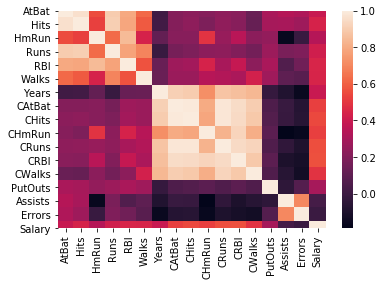

In [53]:
#12)For seeing general table of the dataset show it as heatmap.
corr = hit.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)